# Aprendizaje Automático

## Práctica 2: Regresión lineal con una variable

En esta práctica vamos a implementar la regresión lineal con una variable desde cero. Implementaremos tanto el propio modelo como los algoritmos de aprendizaje de la solución directa y el descenso por gradiente.


### Índice de la práctica
- [Regresión lineal con una variable](#parte1)
    - [Solución directa](#parte2)
    - [Descenso por gradiente](#parte3)
- [Scikit-Learn](#parte4)
- [Parte opcional](#parte5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Helper function to test the correctness of the solutions
def test_nb(var, val, msg=""):
    if var == val:
        print("✔️ Test passed.")
    else:
        print("❌ Test failed. " + msg)
        raise AssertionError(msg)


%matplotlib inline

### Regresión lineal con una variable <a id="parte1"></a>

En primer lugar, vamos a comenzar leyendo y visualizando los datos para posteriormente implementar el modelo de regresión lineal con una variable.

Puedes leer los datos almacenados en el fichero `'house_prices.txt'` mediante la función `loadtxt` de NumPy. Los datos contenidos en este fichero corresponden a un problema en el que se debe predecir el beneficio que obtienen los camiones de comida (food truck) a lo largo de un año en base al número de habitantes de la ciudad en la que venden comida. Este fichero contiene el histórico de los camiones de comida de una franquicia concreta para diferentes ciudades. La primera columna corresponde al número de habitantes de una ciudad (en decenas de miles) y la segunda columna corresponde a los beneficios obtenidos con el camión de comida (en decenas de miles).

Comencemos mostrando los 5 primeros registros para comprobar que la lectura se haya realizado correctamente.

In [3]:
data = np.loadtxt('house_prices.txt', delimiter=',')
# Mostrar 5 primeros registros
data[:5]
#[numero_de_habitantes - en decenas de miles, beneficios_obtenidos_por_el_foodtruck - en decenas de miles]
#es decir debo multiplicar por 10000 para saber la cifra adecuada


array([[5.28 , 2.15 ],
       [3.12 , 1.72 ],
       [5.22 , 2.44 ],
       [4.82 , 1.899],
       [4.7  , 1.955]])

A continuación, vamos crear las matrices con los datos de entrada ($X$) y de salida ($y$) para poder realizar el aprendizaje de los parámetros de la regresión lineal ($\theta$). Recuerda que la primera columna de los datos de entrada debe estar compuesta por unos para poder realizar la multiplicación matricial con $\theta$. Por tanto, la variable `X` estará compuesta por dos columnas: una de unos y otra con los datos correspondientes al número de habitantes de las ciudades. La variable `y` estará compuesta por los beneficios de los camiones de comida en las diferentes ciudades.

In [5]:
# Debes crear una columna de unos y concaternala con la primera columna de data
# Utiliza la función vstack para concatenar dos vectores y luego toma la traspuesta para lograr
# la X en la forma deseada. También podrías usar hstack realizando un reshape previamente o column_stack directamente

unos = np.ones((data.shape[0],1))
x1 = data[:,[0]]

X = np.column_stack([unos,x1])


Y = data[:,1].reshape(-1,1)
Y.shape
# Crea el vector y, que debe ser un vector columna, es decir, una matriz de m x 1. 
# Para ello, debes tomar la segunda columna de data y luego hacer un reshape(-1, 1), pasamos de una matriz de 1D a 2D
# El -1 le indica a numpy que debe estimar el tamaño automáticamente
# <RELLENAR>

(138, 1)

Vamos a mostrar una gráfica de puntos para visualizar la distribución de las instancias del problema. De esta forma podemos comprobar si es posible que el modelo de regresión lineal se ajuste bien a los datos o no.

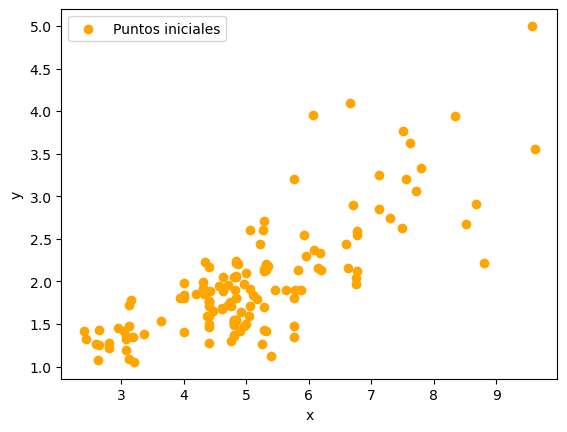

In [6]:
# <RELLENAR>
plt.figure()
plt.scatter(X[:, 1], Y[:, 0], color='orange', label='Puntos iniciales')  # x real vs y
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Nota:** Quizás te sea útil crear una nueva celda de código e introducir el código en una función para poder reutilizarla posteriormete. Tendrás que realizar esta misma figura varias veces.

#### Solución directa <a id="parte2"></a>

Como primera aproximación para la regresión vamos a implementar la solución analítica o directa. Recordemos que tenemos que estimar los parámetros $\theta$, que en caso de la regresión con una única variable son $\theta_0$ y $\theta_1$ tal que $y = \theta_0 + \theta_1\cdot x$. Para ello, y como ya tenemos los datos en la matriz $X$ con la primera columna siendo todo unos, simplemente obtenemos los valores de los parámetros aplicando la siguiente ecuación.

$$\theta = (X^T X)^{-1}X^Ty$$

Ten cuidado ya que $X$ es una matriz e $y$ es un vector (matriz de $n \times 1$). Por tanto, los productos que aparecen son entre matrices. Recuerda que en numpy el producto entre matrices se realiza mediante `np.dot()`.

A continuación, programa la función `reg_directa` que recibe la matriz `X` con los datos de entrada (asumiendo que su primera columna tendrá unos) y la matriz `y` con los de salida, y devuelva los valores de los parámetros $\theta$ mediante la solución directa. 

**Nota:** En Python puedes usar la función `np.linalg.pinv` para obtener la inversa de una matriz.

In [ ]:
print(X.T.shape)

(2, 138)

In [11]:
def reg_directa(X, y):
    theta = np.linalg.pinv(X.T @ X)@ X.T @ y
    return theta

Utiliza ahora la función que acabas de implementar para obtener los valores de $\theta$ para los datos disponibles.

**Nota:** La instrucción `test` comprueba si el resultado que has obtenido es correcto. En caso de que no sea correcto te devolverá un mensaje de error.

In [12]:
theta = reg_directa(X, Y)

test_nb(list(np.round(theta, 4)), [0.1445, 0.3606], 'Valor de theta incorrecto')

✔️ Test passed.


Ahora vamos a mostrar la recta aprendida. 

Puedes hacerlo de la siguiente forma. Primero, crea un array de valores comprendidos entre 5 y 23 con incrementos de 1 en 1 y almacenarlo en la variable `xx`. Después, evalua todos estos valores utilizando los $\theta$ aprendidos anteriormente (variable `theta`) y almacénalos en la variable `yy`. Finalmente, aplica la ecuación de la recta: $y = \theta_0+\theta_1\cdot x$.

Para terminar, muestra la recta aprendida en la figura que también incluye los puntos a partir de los que se ha realizado el aprendizaje (si lo has convertido en una función, ahora puedes reutilizarla!).

Debes replicar esta figura:

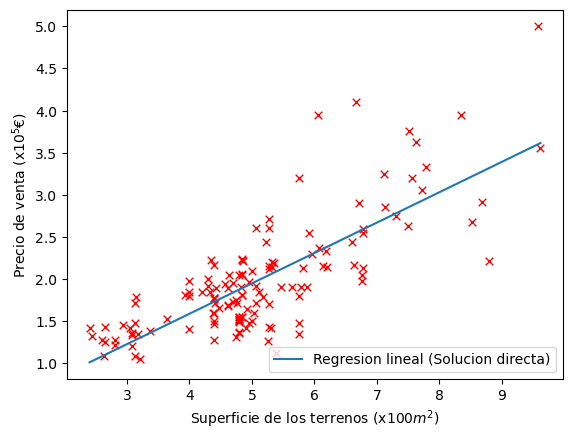

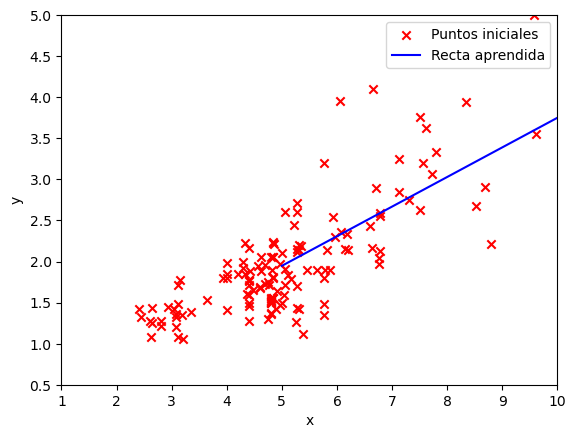

In [ ]:
# Crear las variables xx e yy utilizadas para pintar la gráfica posteriormente
xx = np.arange(5,24,1)
yy = theta[0,0] + theta[1,0] * xx


plt.figure()
plt.scatter(X[:, 1], Y[:, 0], color='red', label='Puntos iniciales', marker='x')
plt.plot(xx, yy, color='blue', label='Recta aprendida')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(1, 10)    # límites en X
plt.ylim(0.5, 5.0)  # límites en Y
plt.legend()
plt.show()

# Pintar la gráfica


¡Ya has programado tu primer algoritmo de machine learning! Vamos ahora a por el descenso por gradiente.

#### Descenso por gradiente <a id="parte3"></a>

Como ya hemos visto en teoría, el método directo tiene ciertos inconvenientes (echa un vistazo a lo que hemos visto en clase si no los recuerdas). En esos casos, el método a utilizar es el descenso por gradiente. Ahora vamos a seguir una serie de pasos para crear nuestro algoritmo de aprendizaje basado en descenso por gradiente.

##### 1. Función de coste

En primer lugar, vamos programar la función de coste para poder aplicar el algoritmo de aprendizaje y que los parámetros de la regresión lineal se ajusten a los datos de tal forma que se minimice dicho coste.

Recuerda que la función de coste se define como: 

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^2$$

Ten en cuenta que si utilizamos la instrucción `X.dot(theta)`, realizamos el producto matricial de los datos de entrada por los parámetros de la regresión. De esta forma lo que logramos es obtener en una única operación la predicción para cada ejemplo de entrada con los parámetros dados. Es decir, obtenemos la predicción del sistema para los datos de entrada: $h_{\theta}\left(x^{(i)}\right)$

In [33]:
def compute_cost(X, y, theta):
    m = y.size

    # Obtener h (la salida para cada ejemplo) y J a partir de la salida (error)
    h = X.dot(theta)
    error = h - y
    J = (1.0 / (2 * m)) * np.sum(error ** 2)

    return J

Vamos a comprobar si la función de coste está bien hecha. Para ello debes crear los valores iniciales de los parámetros $\theta$ de la regresión lineal como un vector columna lleno de ceros (lista de listas de un elemento). Luego, debes llamar a la función `compute_cost` con los datos de entrada (`X`), de salida (`y`) y los parámetros del modelo (`theta`). Almacena el resultado en la variable `resultado` e imprímelo en pantalla.

Recuerda que la instrucción `test` comprueba si el resultado que has obtenido es correcto. En caso de que no sea correcto te devolvera un mensaje de error.

In [34]:
# Crear theta como un array de 0's y obtener el error (coste)
theta = np.zeros(shape=[2, 1])
resultado = compute_cost(X, Y, theta)
print(resultado)

2.1973486775021738


In [35]:
# Test para comprobar la corrección
test_nb(round(resultado, 5), 2.19735, 'Resultado incorrecto')

✔️ Test passed.


Para entender mejor la función de coste, el siguiente código permite visualizar el comportamiento de la función de coste ($J$) en función de los parámetros del modelo ($\theta_1$ y $\theta_2$). Se visualizan dos gráficas: 
1. *Gráfica de contornos*: Se observa el nivel de error en cada punto. Un mismo contorno muestra el mismo valor del error en diferentes puntos del espacio.
2. *Gráfica de superficie*: Nos da una visión tridimensional de cómo varía la función de coste en función de nuestros parámetros.

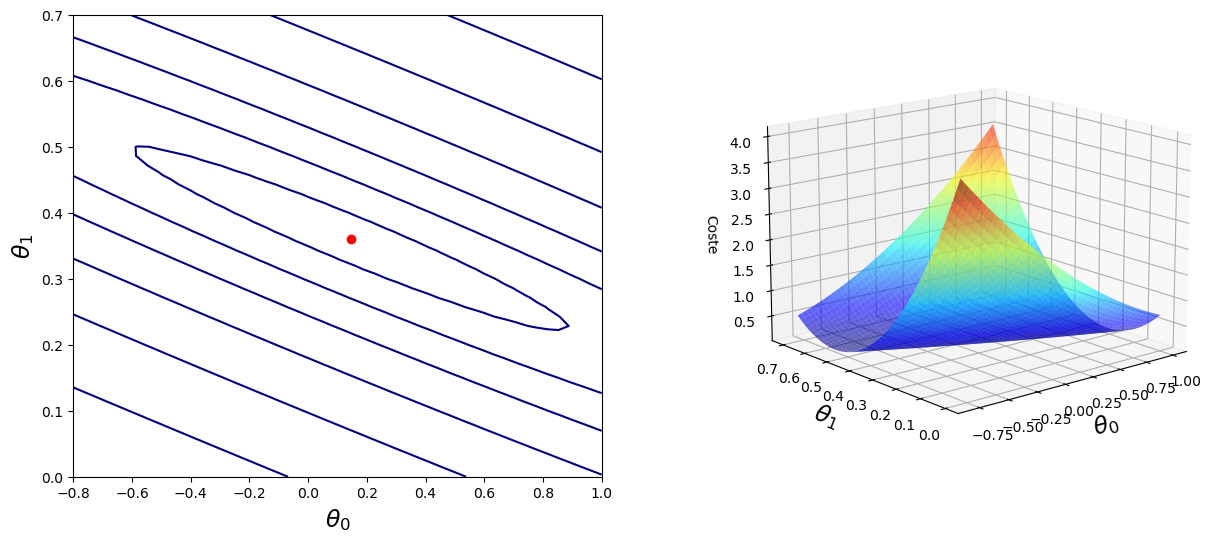

In [ ]:
# Vamos a representar las curvas de nivel y la superficie de la función de coste en el entorno de los valores de theta 
# que hemos encontrado mediante la solución directa, para ver cómo se comporta el error en las proximidades
# de la solución.
#
# Se crean 50 puntos en cada dimensión: en el rango [-0.8, 1] para theta0 y [0, 0.7] para theta1
B0 = np.linspace(-0.8, 1, 50)
B1 = np.linspace(0, 0.7, 50)
# Se crean todas las combinaciones de valores de los puntos creados anteriormente
xx, yy = np.meshgrid(B0, B1, indexing='xy')
# Se crea una matriz donde vamos a almacenar el coste de la predicción (error) para cada combinación
Z = np.zeros((B0.size,B1.size))

# Se calcula el error de cada combinación
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = compute_cost(X,Y, theta=[[xx[i,j]], [yy[i,j]]])

# Se crea una figura con dos plots: uno para cada tipo de gráfico
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Gráfica de la izquierda: contornos (nivel de error)
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
theta = reg_directa(X, Y)
ax1.scatter(theta[0],theta[1], c='r')

# Gráfica de la derecha: comportamiento de la función de coste
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Coste')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# Se asignan las etiquetas de los ejes de las dos gráficas
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

##### 2. Cálculo del gradiente

Una vez calculada la función de coste, nos centramos en el cálculo de su gradiente. Recordemos que para la función de coste definida anteriormente, las derivadas parciales con respecto a $\theta_0$ y $\theta_1$ son:
$$ \dfrac{\partial J}{\partial \theta_0} (\theta)= \frac{1}{m}  \sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)}),   $$
$$ \dfrac{\partial J}{\partial \theta_1} (\theta)= \frac{1}{m}  \sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})  · x_1^{(i)}. $$

Teniendo en cuenta que hemos añadido una columna de 1s a $X$, podemos calcular todos los gradientes de forma simultánea almacenándolos en un vector. Los valores de la variable a predecir ($y$) los tenemos en un vector `y`, si operamos como en la función de coste, podemos conseguir todos los valores de salida de $h_\theta(x)$ en otro vector. Únicamente nos falta restar ambos vectores y hacer la multiplicación matricial de $X^T$ por dicha diferencia para obtener el resultado deseado en forma vectorial. Es decir,
$$ \dfrac{\partial J}{\partial \theta} (\theta)=   \frac{1}{m}  X^T \cdot (h_{\theta}(x) - y). $$


In [ ]:
def compute_gradient(X, y, theta):
    m = y.size
    gradiente = (1.0 / m) * (X.T @ (X @ theta - y))
    return gradiente

In [41]:
test_nb(list(np.round(compute_gradient(X,Y,np.ones(shape=[2,1])), 4)), [4.117, 22.3542], 'Valor de theta incorrecto')

✔️ Test passed.


##### 3. Actualización de parámetros

A continuación vamos a implementar la función del descenso por gradiente para realizar el aprendizaje de los parámetros del modelo. Esta función recibe como parámetros de entrada los valores de entrada (`X`), de salida (`y`), los valores iniciales del modelo (`theta`), el factor de aprendizaje (`alpha`) y el número de iteraciones a realizar por el algoritmo (`num_iter`).

Como salida devuelve los parámetros aprendidos (variable `theta)` así como el historial de la evolución de error cometido con cada configuración de valores del modelo (variable `J_history`). Esta última variable almacena el resultado de la función de coste implementada anteriormente para los valores del modelo que han sido actualizados en la instrucción anterior. 

En cada iteración se deben aplicar los siguientes pasos:
1. Calcular el gradiente de $J$ para los valores de $\theta$ actuales.
2. Actualizar los valores de $\theta$ aplicando
$$ \theta = \theta - \alpha \dfrac{\partial J}{\partial \theta} (\theta)$$

3. Utilizar la función `calcula_coste` para calcular el coste de los nuevos parámetros y guarda el coste en el array `J_history`.

**Nota:** Es necesario el uso de un bucle para controlar las iteraciones.

In [42]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)

    for iter in np.arange(num_iters):
        gradiente = compute_gradient(X, y, theta)
        theta = theta - alpha * gradiente
        J_history[iter] = compute_cost(X, y, theta)
    return theta, J_history

Con el método del gradiente implementado ya podemos realizar el aprendizaje. Para ello debemos llamar a la función `gradient_descent` con los valores de entrada (`X`), los de salida (`y`) y los valores iniciales de los parámetros del modelo (`theta`), inicializados a cero anteriormente. Fijaremos el número de iteraciones a 20. 

A continuación, muestra los parámetros por pantalla y comprueba si son correctos.

Utiliza después la función plot de matplotlib para mostrar la gráfica de la evolución del error con respecto a las iteraciones del descenso por gradiente (es decir, muestra los costes obtenidos en cada iteración).

Debes replicar esta figura:

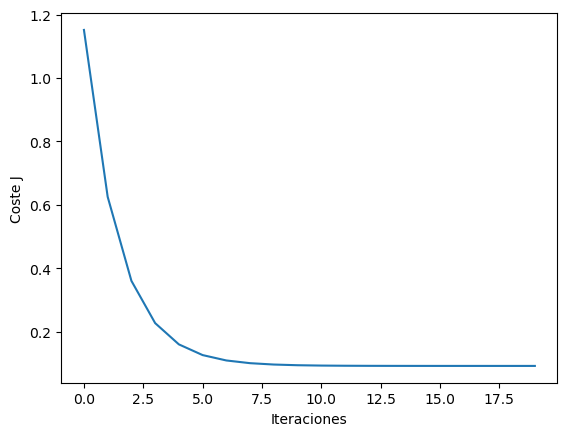

theta:  [0.06910094 0.37389035]


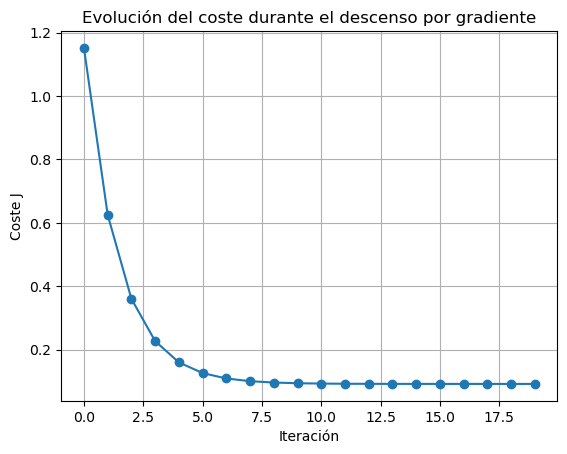

In [44]:
# Comenzamos con theta a 0's y utilizamos la función anterior para optimizar sus valores para obtener el nuevo theta y el historial de J
theta = np.zeros(shape=[2, 1])

theta, J_history = gradient_descent(X, Y, theta, alpha=0.01, num_iters=20)
print('theta: ', theta.ravel())

# Muestra la gráfica con la evolución del coste J obtenido de la salida de gradient_descent
plt.figure()
plt.plot(np.arange(J_history.size), J_history, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Coste J')
plt.title('Evolución del coste durante el descenso por gradiente')
plt.grid(True)
plt.show()

In [45]:
# Comprobamos los valores de theta
test_nb(list(np.round(theta, 5)), [0.0691, 0.37389], 'Valores de theta incorrectos')

✔️ Test passed.


##### 4. Realizar predicciones
Vamos a utilizar los valores de $\theta$ obtenidos para realizar predicciones. En este caso debes predecir el valor de dos terrenos: el primero de 350 metros cuadrados y el segundo de 800. Recuerda que la superficie con la que ha aprendido nuestro modelo de regresión lineal está expresada en cientos de metros cuadrados y el precio en cientos de miles de euros.

Utiliza el modelo aprendido por descenso por gradiente para predecir el precio, en euros, de ambos terrenos.

In [46]:
# Predecir el precio en euros para dos terrenos (terreno1 y terreno2) de 350 y 800 metros cuadrados, respectivamente
x1 = 350 / 100  # cientos de m^2
x2 = 800 / 100
X_pred = np.array([[1, x1], [1, x2]])
ypred = X_pred @ theta  # en cientos de miles de euros
terreno1 = float(ypred[0, 0] * 1e5)
terreno2 = float(ypred[1, 0] * 1e5)
print(terreno1)
print(terreno2)

137771.71802018178
306022.3775187267


In [47]:
test_nb(np.round(terreno1, 5), 137771.71802, 'Valor del terreno 1 incorrecto')
test_nb(np.round(terreno2, 5), 306022.37752, 'Valor del terreno 2 incorrecto')

✔️ Test passed.
✔️ Test passed.


##### 5. Comparación de solución directa y descenso por gradiente
Al igual que hemos hecho antes con la solución directa vamos a mostrar la recta aprendida.

Reutiliza el código anterior para mostrarla.

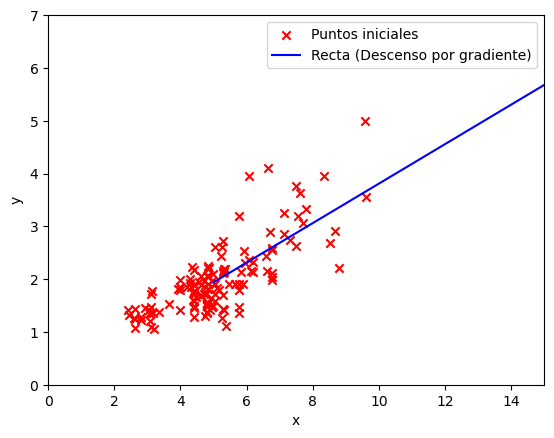

In [55]:
# Crear las variables xx e yy utilizadas para pintar la gráfica posteriormente
xx = np.arange(5, 24, 1)
yy = theta[0, 0] + theta[1, 0] * xx

# Pintar la recta aprendida junto con los puntos
plt.figure()
plt.scatter(X[:, 1], Y, color='red',marker='x', label='Puntos iniciales')
plt.plot(xx, yy, color='blue', label='Recta (Descenso por gradiente)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,15)
plt.ylim(0,7)
plt.legend()
plt.show()

¿Observas diferencias? ¿Son muy diferentes los valores de los parámetros? Dibuja ambas rectas en el mismo gráfico para observar diferencias. ¿A qué se pueden deber estas diferencias?

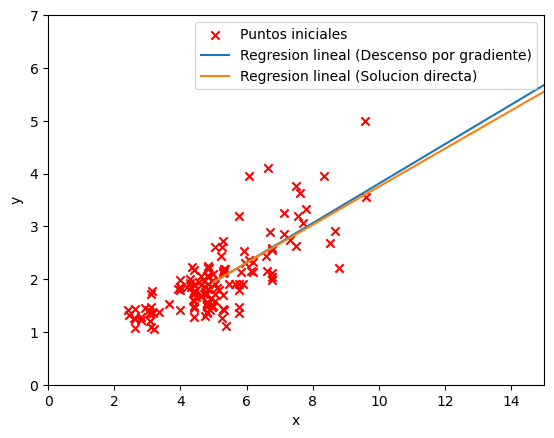

In [ ]:
# Crea las variables xx e yy para cada modelo
xx = np.arange(5, 24, 1)
# Descenso por gradiente (theta ya calculado en celdas previas)
yy = theta[0, 0] + theta[1, 0] * xx
# Solución directa
theta_dir = reg_directa(X, Y)
yy2 = theta_dir[0, 0] + theta_dir[1, 0] * xx

# Crea la gráfica
plt.figure()
plt.scatter(X[:, 1], Y, color='red', marker='x', label='Puntos iniciales')
plt.plot(xx, yy, label='Regresion lineal (Descenso por gradiente)')
plt.plot(xx, yy2, label='Regresion lineal (Solucion directa)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 15)
plt.ylim(0, 7)
plt.legend()
plt.show()

#La diferencia de las rectas se puede deber al numero de iteraciones del descenso por gradiente ya que puede no llegar al minimo exacto mientras que la solucion directa da el optimo exacto.

### Scikit-Learn <a id="parte4"></a>
Otra forma de entrenar y utilizar un modelo de regresión lineal es utilizar la librería que Python nos ofrece para realizar tareas de aprendizaje automático: [scikit-learn](http://scikit-learn.org/stable/), también conocida como sklearn.

En el caso concreto de la regresión lineal, existe el paquete [linear_model](http://scikit-learn.org/stable/modules/linear_model.html) donde encontramos la función [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Estos son los pasos que tenemos que seguir:

* **Importar la librería:** Para empezar, importaremos la clase `LinearRegression` del módulo `linear_model` proporcionado por scikit-learn. 
* **Inicializar el modelo:** Creamos una instancia de la clase `LinearRegression` utilizando su constructor.
* **Aprendizaje:** Realizamos el aprendizaje y para ello se utiliza la función `fit`, a la que se le pasan los datos de entrada (`X`) y las salidas correspondientes (`y`). Esta función realiza el aprendizaje de manera interna, ajustando los parámetros del modelo, que incluyen el término independiente (conocido como `intercept_`) y los coeficientes ($\theta$) asociados a cada variable del problema (almacenados en `coef_`).
* **Predicciones:** Para hacer predicciones sobre nuevos datos tenemos dos opciones
    * Utilizar `intercept_` y `coef_` aplicando la ecuación de la regresión lineal: $ y = intercept\_ + coef\_ \cdot x $
    * Utilizar la función `predict`, a la que se le pasa los datos de entrada de las instancias a predecir y devuelve las predicciones.

En el código mostrado a continuación se ve un ejemplo del uso de esta librería con comentarios sobre qué se realiza en cada instrucción de código. 

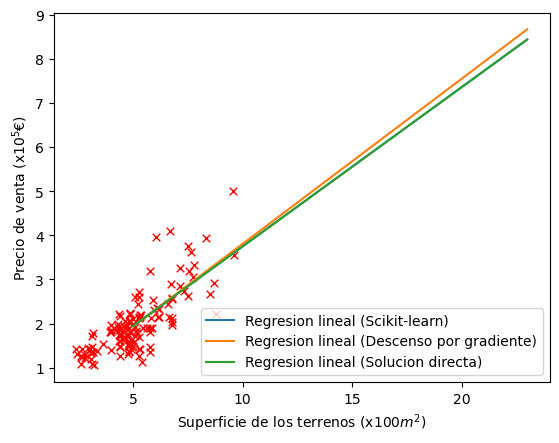

In [60]:
# Se importa de la libreria scikit-learn de python (sklearn) el paquete correspondiente a la regresión lineal
from sklearn.linear_model import LinearRegression

# Se incializa el modelo llamando al constructor de la regresión lineal: todos los parámetros se asignan a sus valores por defecto
regr = LinearRegression()
# Se entrena el modelo (aprendizaje) utilizando la variable de entrada sin los unos X[:,1] y la variable de salida (y)
# La función ravel devuelve una lista (si la entrada es una lista de listas coge todos los elementos y los almacena en la lista devuelta)
# En la función reshape el valor -1 significa que el tamaño de esa dimensión se calcula automáticamente en base a la otra
# En este caso hacemos una columna de tantas filas como instancias tengan los datos
regr.fit(X[:, 1].reshape(-1, 1), Y.ravel())
# Se evalúan los valores creados anteriormente para comparar ambos modelos aprendidos
prediccionesOpcion1 = regr.intercept_ + regr.coef_ * xx
prediccionesOpcion2 = regr.predict(xx.reshape(-1, 1))

# Vamos a comparar el resultado de scikit con los nuestros
plt.plot(xx, prediccionesOpcion2, label='Regresion lineal (Scikit-learn)')
# Se muestra los datos a partir de los cuales se ha aprendido
plt.scatter(X[:, 1], Y, s=30, c='r', marker='x', linewidths=1)
# Se muestra la recta aprendida anteriormente para comparar
plt.plot(xx, yy, label='Regresion lineal (Descenso por gradiente)')
plt.plot(xx, yy2,label='Regresion lineal (Solucion directa)')

plt.xlabel('Superficie de los terrenos (x$100m^2$)')
plt.ylabel('Precio de venta (x$10^5€$)')
plt.legend(loc=4);

¿Qué metodo está utilizando scikit-learn? ¿La solución directa o el descenso por gradiente?

In [ ]:
#Respuesta
#Usa una variante de la solucion directa, con minimos cuadrados ordinarios

RESPONDE AQUÍ A LA PREGUNTA DE FORMA JUSTIFICADA

### Parte opcional <a id="parte5"></a>

Los ejercicios anteriores permiten, si se completan perfectamente, alcanzar un 8.5 en esta práctica (notable). Esta última parte se valora 1.5 puntos, permitiendo alcanzar el 10 (sobresaliente).

#### 1. Seguimiento de los parámetros en descenso por gradiente

Modifica la función `gradient_descent` para que devuelva una matriz (o lista) con los valores de $\theta$ de cada iteración. Ahora utiliza estos valores para mostrar los puntos por los que ha ido pasando el descenso por gradiente en una gráfica de contornos igual a la que hemos mostrado cuando hemos implementado la función de coste (la de la izquierda).

Debes replicar esta figura:
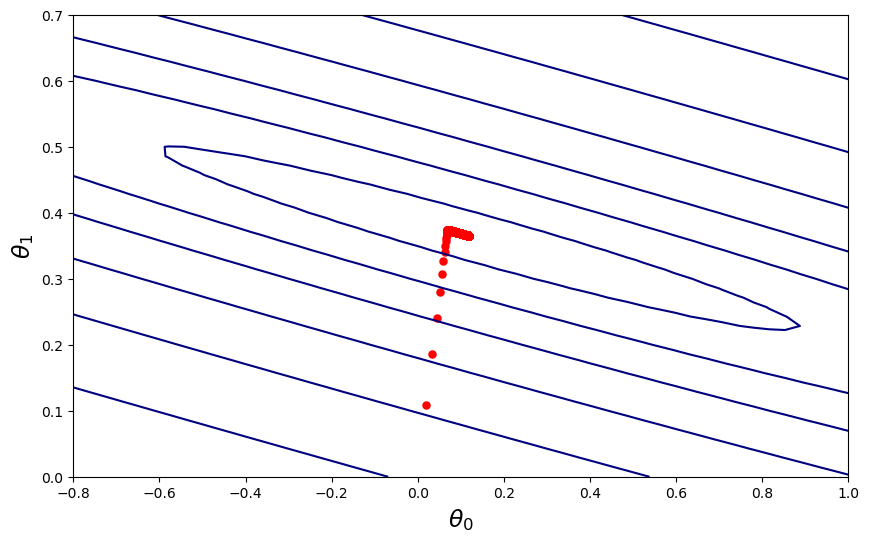

theta: [0.118894 0.365243]


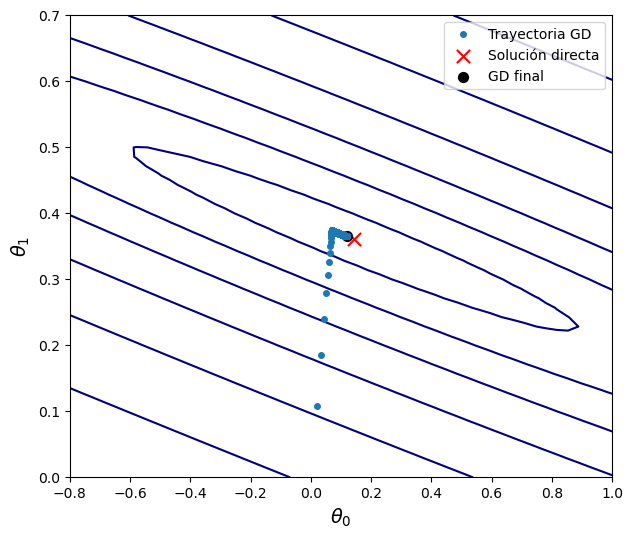

In [92]:
def gradient_descent(X, y, theta, alpha=0.01, num_iters=1500):
    # asegurar tipos y formas
    X = X.astype(float)
    y = y.ravel().astype(float)
    theta = theta.ravel().astype(float)

    m = X.shape[0]
    J_history = np.zeros(num_iters)
    thetas    = np.zeros((num_iters, theta.size))

    for t in range(num_iters):
        # gradiente
        grad  = (X.T @ (X @ theta - y)) / m              # (1/m) X^T (Xθ - y)
        # update
        theta = theta - alpha * grad
        # guardar DESPUÉS del update
        thetas[t, :] = theta
        # coste con el θ actualizado
        err = X @ theta - y
        J_history[t] = (err @ err) / (2.0 * m)           # (1/(2m)) ||Xθ - y||^2

    return theta, J_history, thetas




# Obtener theta, el historial del coste y el de los thetas (llamado thetas)
# Inicializamos theta a 0's
# θ inicial
theta0 = np.zeros(X.shape[1])

# ¡Usa 1500 iteraciones!
theta, J_history, thetas = gradient_descent(X, Y, theta0, alpha=0.01, num_iters=1500)

print("theta:", np.round(theta, 6))  # debería dar [0.11889 0.36524] (aprox)



# Pintar la gráfica de contornos con cada uno de los puntos por los que ha pasado el descenso por gradiente
B0 = np.linspace(-0.8, 1, 50)
B1 = np.linspace(0, 0.7, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))
for (i, j), _ in np.ndenumerate(Z):
    Z[i, j] = compute_cost(X, Y, theta=[[xx[i, j]], [yy[i, j]]])

fig, ax = plt.subplots(figsize=(7,6))

# Contorno (como ya tienes)
CS = ax.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)

# Trayectoria (incluye el θ inicial en thetas[0])
ax.plot(thetas[:,0], thetas[:,1], 'o', markersize=4, linewidth=1, label='Trayectoria GD')

# Solución directa
theta_dir = reg_directa(X, Y).ravel()
ax.scatter(theta_dir[0], theta_dir[1], c='r', marker='x', s=90, label='Solución directa')

# Punto final GD
ax.scatter(theta[0], theta[1], c='k', s=50, label='GD final')

ax.set_xlabel(r'$\theta_0$', fontsize=14)
ax.set_ylabel(r'$\theta_1$', fontsize=14)
ax.legend(loc='best')
plt.show()


In [93]:
test_nb(list(np.round(theta, 5)), [0.11889,  0.36524], 'Valores de theta incorrectos')
test_nb(list(np.round(thetas[25:30], 5).ravel()), [0.06949, 0.37417, 0.06955, 0.37418, 0.06961, 0.37418, 0.06966, 0.37417, 0.06972, 0.37417], 'Valores del historial de thetas incorrectos')

✔️ Test passed.
✔️ Test passed.


#### 2. Otras funciones de coste

Si utilizamos el descenso por gradiente, podemos utilizar otras funciones de coste siempre que estas sean continuas y derivables. En esta sección vamos a modificar las funciones del coste (`compute_cost`) y del gradiente (`compute_grad`) para poder utilizar otra expresión para la función de coste.

Concretamente, vamos a utilizar la que se define como: 

$$J(\theta) = \frac{1}{4m}\sum_{i=1}^m \left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^4.$$

Si te fijas, hemos sustuido el 2 por el 4, penalizando mucho más los errores grandes.

Modifica ahora las funciones necesarias para realizar el aprendizaje basándote en esta función de coste. Termina dibujando un gráfico que muestre la recta de regresión calculada por scikit-learn y la recta aprendida por esta función de coste modificada. 

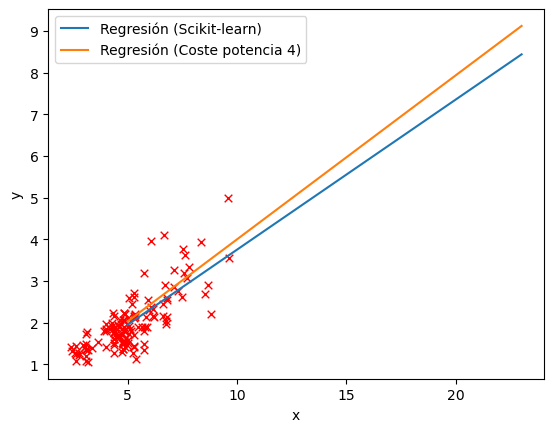

In [95]:
# Definir la nueva función de coste y su gradiente (potencia 4)
from sklearn.linear_model import LinearRegression


def compute_cost_p4(X, y, theta):
    m = y.size
    e = X @ theta - y
    return (1.0 / (4 * m)) * np.sum(e ** 4)


def compute_gradient_p4(X, y, theta):
    m = y.size
    e = X @ theta - y
    # grad = (1/m) * X^T (e^3)
    return (1.0 / m) * (X.T @ (e ** 3))


def gradient_descent_p4(X, y, theta, alpha=1e-4, num_iters=5000):
    J_history = np.zeros(num_iters)
    for it in range(num_iters):
        theta = theta - alpha * compute_gradient_p4(X, y, theta)
        J_history[it] = compute_cost_p4(X, y, theta)
    return theta, J_history

# Entrenar con la nueva función de coste (ajusta alpha/iteraciones si fuera necesario)
theta0 = np.zeros((2, 1))
theta_p4, J_hist_p4 = gradient_descent_p4(X, Y, theta0, alpha=1e-4, num_iters=5000)

# Asegurar xx local para la comparación
yy_xx = np.arange(5, 24, 1)

# Rectas para comparar
yy_sk = LinearRegression().fit(X[:, 1].reshape(-1, 1), Y.ravel()).predict(yy_xx.reshape(-1, 1))
yy_p4 = theta_p4[0, 0] + theta_p4[1, 0] * yy_xx

plt.figure()
plt.plot(yy_xx, yy_sk, label='Regresión (Scikit-learn)')
plt.plot(yy_xx, yy_p4, label='Regresión (Coste potencia 4)')
plt.scatter(X[:, 1], Y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


¿Tienen sentido las diferencias?

In [ ]:
#si, el coste potencia 4 penaliza mucho más los errores grandes, por lo que la recta se ajusta para reducir outliers de forma más agresiva,Scikit-learn (OLS, MSE) minimiza el error cuadrático medio. Es sensible a outliers, pero menos que potencias mayores.

RESPONDE AQUÍ A LA PREGUNTA RAZONADAMENTE